this notebook is for Week10-Assignment
author: Rui Zeng, N15471955, rz2522@nyu.edu
Assignment:
Use scipy curve_fit to fit this curve to a lennard-jones potential with parameters `sigma` and `eps` as below

```
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )`
```

- Make a nice plot of the energy versus distance with the computed values as dots and the values from the fit function with a dashed line, as shown in the lecture
- Save this figure in the figures directory

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# data path
data_path = '../Data/energy.dat'
# load data
data = np.loadtxt(data_path, skiprows=5)
# check data
print(data)

[[ 3.5       0.16982 ]
 [ 3.8      -0.069454]
 [ 4.       -0.122889]
 [ 4.2      -0.11645 ]
 [ 4.5      -0.095152]
 [ 4.8      -0.073689]
 [ 5.       -0.055968]
 [ 5.2      -0.042323]
 [ 5.5      -0.032099]
 [ 5.8      -0.024511]
 [ 6.       -0.018882]]


In [3]:
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

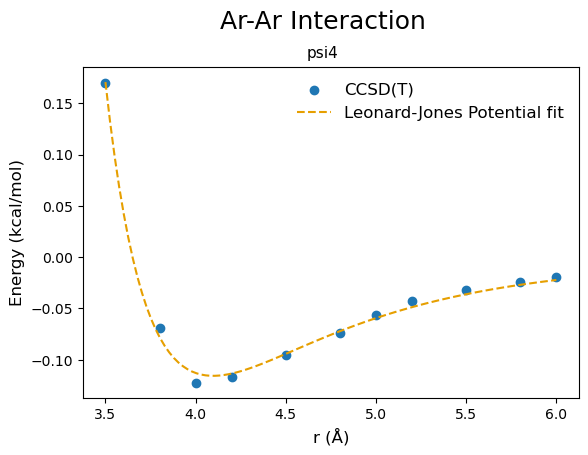

In [10]:
# figure 1  -  energy vs r
fig = plt.figure()
# scatter plot
plt.scatter(data[:,0],data[:,1],label='CCSD(T)')
# fit
popt, pcov = curve_fit(lj, data[:,0], data[:,1])
# plot fit, dashed line, colorblind friendly, red 
r = np.linspace(3.5,6.0,100)
plt.plot(r,lj(r,*popt),'--',color='#E69F00',label='Leonard-Jones Potential fit')

# labels, x unit is angstrom, y unit is kcal/mol
plt.xlabel('r (Å)',fontsize=12)
plt.ylabel('Energy (kcal/mol)',fontsize=12)
# legend
plt.legend(frameon=False,fontsize=12)

# two lines of title
plt.text(x=0.5, y=0.88, s="Ar-Ar Interaction", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "psi4", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig1.Ar-Ar_Interaction.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')